In [58]:
# 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models, transforms  
from tkinter import *
from PIL import ImageTk
from tkinter import filedialog as tkFileDialog
import cv2
from PIL import Image

In [59]:
def imshow(picture):
    img_dir = picture
    image = Image.open(img_dir)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [60]:
# Load the pretrained model from pytorch
severity_network = models.resnet50(pretrained=True)

# Newly created modules have require_grad=True by default
# got 0.87:
severity_network.fc = nn.Sequential(
               nn.Linear(2048, 1024),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(1024, 512),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(512, 256),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(256, 128),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(128, 3))

# Load model
severity_network.load_state_dict(torch.load("Res_cars_81_nd"))

severity_network = severity_network.eval()

In [61]:
# Load the pretrained model from pytorch
location_network = models.resnet50(pretrained=True)

# Newly created modules have require_grad=True by default
location_network.fc = nn.Sequential(
               nn.Linear(2048, 1024),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(1024, 512),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(512, 256),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(256, 3))

# Load model
location_network.load_state_dict(torch.load("res_location_81"))

location_network = location_network.eval()

In [62]:
# Load the pretrained model from pytorch
part_network = models.resnet50(pretrained=True)

# Newly created modules have require_grad=True by default
part_network.fc = nn.Sequential(
               nn.Linear(2048, 1024),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(1024, 512),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(512, 256),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(256, 4))

# Load model
part_network.load_state_dict(torch.load("res_part_83"))

part_network = part_network.eval()

In [80]:
# Load the pretrained model from pytorch
scratch_network = models.resnet50(pretrained=True)

# Newly created modules have require_grad=True by default
scratch_network.fc = nn.Sequential(
               nn.Linear(2048, 1024),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(1024, 512),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(512, 256),
               nn.ReLU(inplace=True),
               nn.Dropout(),
               nn.Linear(256, 2))

# Load model
scratch_network.load_state_dict(torch.load("res_scratchdent_82"))

scratch_network = scratch_network.eval()

In [81]:
def get_severity(img_dir):
    data_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()])

    image = Image.open(img_dir)
    image = data_transform(image).float()
    image = image.clone().detach()
    image = image.unsqueeze(0)

    output = severity_network(image)
    _, preds = torch.max(output, 1)
    label = ""
    if preds.item() == 0:
        label = "minor"
    if preds.item() == 1:
        label = "moderate"
    if preds.item() == 2:
        label = "severe"    
    return preds.item(), label

print(get_severity('C:/Users/Carel/Documents/Infosys_car_insurance/test_data/3.jfif'))

(0, 'minor')


In [82]:
def get_side(img_dir):
    data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.4362, 0.4276, 0.4359],
                         	[0.2626, 0.2570, 0.2596])])

    image = Image.open(img_dir)
    image = data_transform(image).float()
    image = image.clone().detach()
    image = image.unsqueeze(0)
    output = location_network(image)
    _, preds = torch.max(output, 1)
    label = ""
    if preds.item() == 0:
        label = "front"
    if preds.item() == 1:
        label = "rear"
    if preds.item() == 2:
        label = "side"    
    return preds.item(), label

print(get_side('C:/Users/Carel/Documents/Infosys_car_insurance/test_data/3.jfif'))

(2, 'side')


In [83]:
def get_part(img_dir):
    data_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()])
    
    image = Image.open(img_dir)
    image = data_transform(image).float()
    image = image.clone().detach()
    image = image.unsqueeze(0)
    output = part_network(image)
    _, preds = torch.max(output, 1)
    label = ""
    if preds.item() == 0:
        label = "door"
    if preds.item() == 1:
        label = "hood"
    if preds.item() == 2:
        label = "trunk"   
    if preds.item() == 3:
        label = "window"   
    return preds.item(), label

print(get_part('C:/Users/Carel/Documents/Infosys_car_insurance/test_data/4.jfif'))

(0, 'door')


In [85]:
def get_scratch(img_dir):
    data_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()])
    
    image = Image.open(img_dir)
    image = data_transform(image).float()
    image = image.clone().detach()
    image = image.unsqueeze(0)
    output = scratch_network(image)
    _, preds = torch.max(output, 1)
    label = ""
    if preds.item() == 0:
        label = "dent"
    if preds.item() == 1:
        label = "scratch"
    return preds.item(), label

print(get_scratch('C:/Users/Carel/Documents/Infosys_car_insurance/test_data/3.jfif'))

(1, 'scratch')


In [86]:
def classify_car_damage(img_location, require_input=False):
    imshow(img_location)
    severity = get_severity(img_location)
    if severity[0] == 0:
        print("Car has minor damage.")
        if require_input:
            input()
        side = get_side(img_location)
        scratch_dent = get_scratch(img_location)
        print("Damage location: " + side[1])
        print("The car has a: " + scratch_dent[1])
    if severity[0] == 1:
        print("Car is moderately damaged.")
        if require_input:
            input()
        side = get_side(img_location)
        part = get_part(img_location)
        print("Damage location: " + side[1])
        print("Damaged part: " + part[1])
    if severity[0] == 2:
        print("""Car is severily damaged and is considered "total loss".""")


Car has minor damage.
Damage location: front
The car has a: scratch


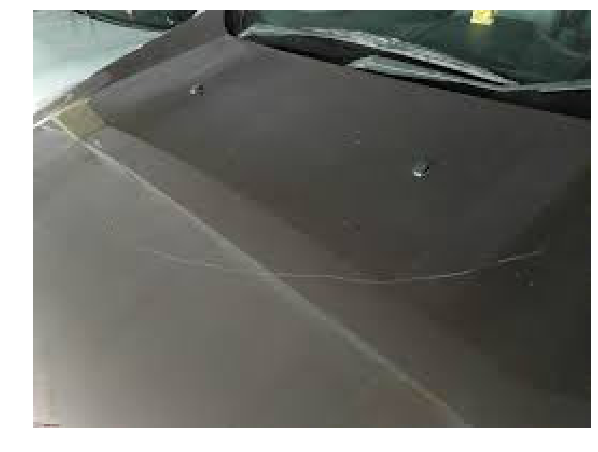

In [90]:
classify_car_damage("C:/Users/Carel/Documents/Infosys_car_insurance/test_data/9.jfif", require_input=False)

In [179]:
def get_car_model(example_path):
    model = "unknown"
    year = "2019"
    try:
        example_number = int(example_path.split("test_data/")[1].split(".jfif")[0])
    except:
        # 0 means somethings wrong with the folder
        example_number = 0
    if example_number == 1:
        model = "Toyota Yaris"
        year = "2007"
    if example_number == 2:
        model = "BMW M5"
        year = "2015"
    if example_number == 3:
        model = "Unknown"
        year = "2012"
    if example_number == 4:
        model = "Nissan Sentra"
        year = "2004"
    if example_number == 5:
        model = "Chevrolet"
        year = "2010"
    if example_number == 6:
        model = "Nissan Altima"
        year = "2014"
    if example_number == 7:
        model = "Volkswagen Passat"
        year = "2010"
    if example_number == 8:
        model = "Volkswagen Golf"
        year = "2001"
    if example_number == 9:
        model = "Unknown"
        year = "2016"
    return model, year

def get_damage_cost(severity, part, scratch_dent, year):
    material = 0
    labor = 0
    additional = 0
    depreciation = 0
    age = 2019 - int(year)
    if severity[0] == 0:
        # minor
        if scratch_dent[0] == 0:
            # dent
            labor = 800
        if scratch_dent[0] == 1:
            # scratch
            material = 150
            labor = 400
    if severity[0] == 1:
        # moderate
        if part[0] == 0:
            # "door"
            material = 11000
            depreciation = age * 800
            labor = 2000
            additional = 3000
        if part[0] == 1:
            # "hood"
            material = 7000
            depreciation = age * 400
            labor = 1500
            additional = 3000
        if part[0] == 2:
            # "trunk"
            material = 21000
            depreciation = age * 1200
            labor = 3000
            additional = 3000
        if part[0] == 3:
            # "window" 
            material = 5000
            depreciation = age * 400
            labor = 1000
            additional = 3000
        
    if severity[0] == 2:
        # total loss
        
        material += 1600000
        depreciation += 80000 * age
        additional = 10000
    
    return material, labor, additional, depreciation
        
        # Cost of replacement materials + Labor Cost + Additional Coverages - Deductibles and Depreciation

In [182]:
class img():
    def __init__(self):
        self.path = ""
        self.panelA = None
        self.analyse_button = None
        self.cost_button = None
        self.text = None
        self.cost_text = None
        self.side = []
        self.scratch_dent = []
        self.model, self.year = [], []
        self.severity = []
        self.part = []
        
    def select_image(self):
        # open a file chooser dialog and allow the user to select an input image
        self.path = tkFileDialog.askopenfilename()
        # ensure a file path was selected
        if len(self.path) > 0:
            # load the image from disk, convert it to grayscale, and detect
            # edges in it
            image = cv2.imread(self.path)

            # OpenCV represents images in BGR order; however PIL represents
            # images in RGB order, so we need to swap the channels
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             scale_percent = int(256 / image.shape[0])
#             width = int(image.shape[1] * scale_percent)
#             height = int(image.shape[0] * scale_percent)
#             dim = (width, height)
#             # resize image
#             image = cv2.resize(image, dim)

            # convert the images to PIL format...
            image = Image.fromarray(image)

            # ...and then to ImageTk format
            image = ImageTk.PhotoImage(image)
            # if the panels are None, initialize them
            if self.panelA is None or self.analyse_button is None:
                # the first panel will store our original image
                if self.panelA is None:
                    self.panelA = Label(image=image)
                    self.panelA.image = image
                    self.panelA.pack(side="top")
                if self.analyse_button is None:
                    self.analyse_button = Button(root, text="Analyse", command=self.analyse)
                    self.analyse_button.pack(side="top", expand="no", padx="10", pady="10")
            # otherwise, update the image panels
            else:
                # update the pannels
                if self.text is not None:
                    self.text.delete('1.0', INSERT)
                    self.text.pack_forget()
                if self.cost_text is not None:
                    self.cost_text.delete('1.0', INSERT)
                    self.cost_button.pack_forget()
                    self.cost_text.pack_forget()
                    
                self.panelA.configure(image=image)
                self.panelA.image = image
                self.analyse_button.configure(command=self.analyse)
    
    def analyse(self):
        self.severity = get_severity(self.path)
        if self.text is not None:
            self.text.delete('1.0', INSERT)
            
        if self.cost_text is not None:
            self.cost_text.delete('1.0', INSERT)
        
        if self.text is None:
            self.text = Text(root, height=5, width=50)
            
        self.model, self.year = get_car_model(self.path)
        self.text.insert(INSERT, "Car model is: " + str(self.model) + "\nBuild year is: " + str(self.year) + "\n")
        
        if self.severity[0] == 0:
            self.text.insert(INSERT, "Car damage severity is: Minor\n")
            self.side = get_side(self.path)
            self.text.insert(INSERT, "Damage location: " + self.side[1] + "\n")
            self.scratch_dent = get_scratch(self.path)
            self.text.insert(INSERT, "The car has sustained a: " + self.scratch_dent[1])
            
        if self.severity[0] == 1:
            self.text.insert(INSERT, "Car damage severity is: Moderate\n")
            self.side = get_side(self.path)
            self.part = get_part(self.path)
            self.text.insert(INSERT, "Damage location: " + self.side[1] + "\n")
            self.text.insert(INSERT, "Damaged part: " + self.part[1])
            
        if self.severity[0] == 2:
            self.text.insert(INSERT, "Car damage severity is: Total loss\n")
        
        self.text.pack()
        
        if self.cost_button is None:
            self.cost_button = Button(root, text="Estimate Cost", command=self.estimate_cost)
            self.cost_button.pack(side="top", expand="no", padx="10", pady="10")
            
        # otherwise, update the image panels
        else:
            self.cost_button.configure(command=self.estimate_cost)
            self.cost_button.pack(side="top", expand="no", padx="10", pady="10")
            
    def estimate_cost(self):
        material, labor, additional, depreciation = get_damage_cost(self.severity, self.part, self.scratch_dent, self.year)
        if self.cost_text is not None:
            self.cost_text.delete('1.0', INSERT)
      
        if self.cost_text is None:
            self.cost_text = Text(root, height=9, width=120)
            
        self.cost_text.insert(INSERT, "Total claim cost = ")
        self.cost_text.insert(INSERT, "[Cost of replacement materials + Labor Cost + Additional Coverages] - [Deductibles and Depreciation]\n")
        self.cost_text.insert(INSERT, "\nCost of replacement materials: " + str(material) + " \n")
        self.cost_text.insert(INSERT, "Labor Cost: " + str(labor) + " \n")
        self.cost_text.insert(INSERT, "Additional Coverages: " + str(additional) + " \n")
        self.cost_text.insert(INSERT, "Deductibles and Depreciation: " + str(depreciation) + " \n")
        self.cost_text.insert(INSERT, "\nTotal claim cost: " + str(material + labor + additional - depreciation))
        self.cost_text.pack() 
        
        
# initialize the window toolkit along with the two image panels
root = Tk()
root.title("Welcome to car damage classification app")
# root.configure(background='yellow green')
root.geometry('1000x600')

# create a button, then when pressed, will trigger a file chooser
# dialog and allow the user to select an input image; then add the
# button the GUI
car_image = img()
btn = Button(root, text="Select an image", command=car_image.select_image)
btn.pack(side="top", expand="no", padx="10", pady="10")


# kick off the GUI
root.mainloop()


In [93]:
# drag and select
# beautiful?

# slides before wednesday morning
# video of demo
# hand over all the code
# date will hear when

# Reduce gray space: more pictures?
# For the analyse text: make it clearer, maybe table?